# Pyber dataset - Three Observable Trends #
* Jadd Cheng
* August 24, 2019
* Note on color scheme: I used **Gold, LightSkyBlue and LightCoral** for the colors of the plot and pie charts instead of **Gold, SkyBlue and Coral** as the assignment specified. On my computer, the colors came out much closer to the ones in the starter notebook.

## Trend 1 Ride trend: Majority urban ##
* Rides were clearly a urban-suburban phenomenon.
* Out of a total of **2375** unique rides, **68.4% (1625)** occurred in urban areas.
* When combined with suburban rides, **94.7%** of all unique rides occurred in urban-suburban areas.

## Trend 2 Driver trend: Overwhelmingly urban ##
* Urban areas also had the most drivers by far. Out of a total **2973** drivers, **80.9% (2405)** were in urban areas.
* Meanwhile, there were only **78** drivers in rural areas.

## Trend 3 Fare trend: Fewer rural riders but higher average fares ##
* Rural trips represented only **6.8% (125)** of total trips taken but their average fare cost **34.62** vs. **24.52** in urban cities.
* The bubble scatter plot illustrates this trend well. There were clearly fewer riders and drivers in rural areas but their fares were on average much higher than their urban and suburban counterparts.
* Meanwhile, the larger red bubbles clustering near the bottom right of the plot represent high driver and ride counts but on average lower fares.
* Again, this suggests a higher concentration of people traveling shorter distances, which is consistent with an urban environment.

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge_df = pd.merge(ride_df, city_df, how='left', on='city')

# Display the data table for preview
merge_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [1]:
# SAMPLE OUTPUT. REFERENCE ONLY. DO NOT RUN OR DELETE.

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

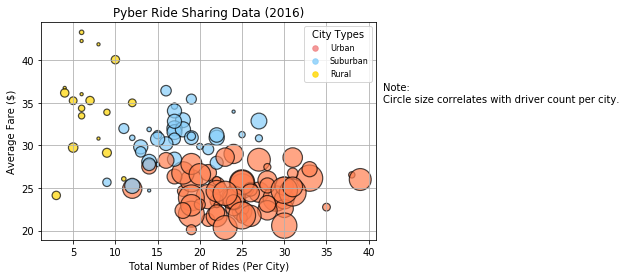

In [3]:
# Obtain the x and y coordinates for each of the three city types

# X-axis Total Number of Rides Per City --> 'ride id' represents a unique trip. nunique() method returns the number of unique instances.
total_rides_by_city = merge_df.groupby('city')['ride_id'].nunique()

# Y-axis Average Fare ($) Per City
avg_fare_by_city = ride_df.groupby('city')['fare'].mean()

# Calculate Total Number of Drivers Per City bubble sizes.
driver_count_by_city = city_df.groupby('city')['driver_count'].sum()

# Create a DataFrame of cities and their types (Urban, Suburban, Rural). Set index to 'city' column and sort by it.
city_types = city_df[['city', 'type']].set_index('city').sort_index()

# Define color map and custom function to determine color of bubbles by city type.
colors = pd.Series({'Urban':'coral', 'Suburban':'lightskyblue', 'Rural':'gold'})
color_func = city_types['type'].apply(lambda x: colors[x])

# Build the scatter plots for each city types
fig, ax = plt.subplots()

# Normalize size of bubbles by multiplying by 10.
ax.scatter(total_rides_by_city, avg_fare_by_city,
                      s=driver_count_by_city*10,
                      c=color_func,
                      alpha=0.7,
                     edgecolor="black",
                    linewidths=1.2
                    )

# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid()

# Create a legend for city type bubbles.
# Matplotlib doesn't make it easy to plot two separate legends. I used the add_artist() and the mpatches module to add multiple legends.
# For the first legend, I plotted three empty points and labeled each point with a city type.
for city in ['Urban', 'Suburban', 'Rural']:
    ax.scatter([], [], label=str(city), alpha=0.8)
leg1 = ax.legend(scatterpoints=1, labelspacing=0.5, title='City Types', loc="upper right", fontsize=12, prop={'size':8})
ax.add_artist(leg1)

# Manually hardcode color and size of the legend scatter points with legendHandles attributes.
leg_t = ax.get_legend()
leg_t.legendHandles[0].set_color('lightcoral')
leg_t.legendHandles[0]._sizes = [30]
leg_t.legendHandles[1].set_color('lightskyblue')
leg_t.legendHandles[1]._sizes = [30]
leg_t.legendHandles[2].set_color('gold')
leg_t.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
# For the second legend, added patch plot object with the mpatches module.
# Set transparency of rectangle shape next to the note with alpha=0. 
import matplotlib.patches as mpatches

leg_note = mpatches.Patch(alpha=0, color='white', label='Note:\nCircle size correlates with driver count per city.')
leg2 = plt.legend(handles=[leg_note], loc="center left", frameon=False, bbox_to_anchor=(0.91, 0, 0.5, 1.35))
text='Note:\nCircle size correlates with driver count per city'

# Save Figure
bubble_plot = plt.savefig('ride_sharing_data_bubble_plot.png')

# Show plot
plt.show()

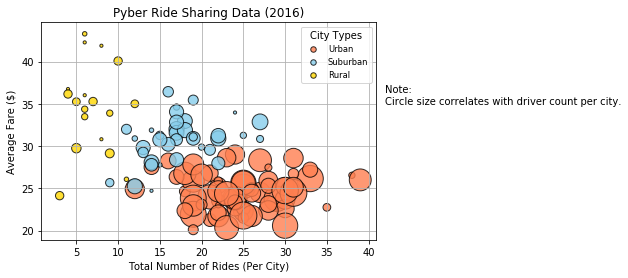

In [3]:
# SAMPLE OUTPUT. REFERENCE ONLY. DO NOT RUN OR DELETE.

# Show plot
plt.show()

## Total Fares by City Type

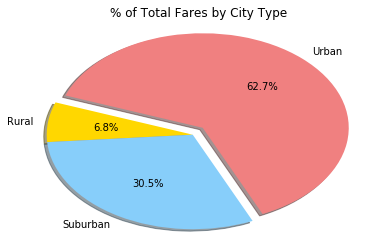

In [4]:
# Calculate Type Percents
type_groupby_fare = merge_df.groupby('type')['fare'].sum()
type_groupby_fare = type_groupby_fare.to_frame()
type_groupby_fare['pct_total_fares_by_type'] = (type_groupby_fare['fare']/type_groupby_fare['fare'].sum())*100

# Build Pie Chart
labels=['Rural', 'Suburban', 'Urban']
sizes = type_groupby_fare['fare'].values
explode = (0, 0, 0.1)
colors = ['gold','lightskyblue','lightcoral']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct= '%1.1f%%',
        shadow=True, startangle=160)
plt.title("% of Total Fares by City Type")
plt.axis('auto')

# Save Figure
pie_chart_1 = plt.savefig('pct_total_fares_by_type_pie_chart.png')

# Show Figure
plt.show()

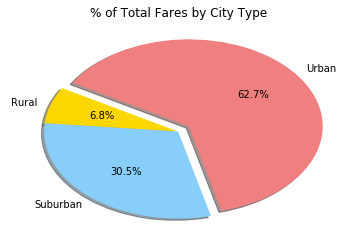

In [4]:
# SAMPLE OUTPUT. REFERENCE ONLY. DO NOT RUN OR DELETE.

## Total Rides by City Type

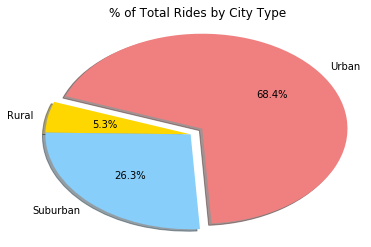

In [6]:
# Calculate Ride Percents
city_type_total_rides = merge_df.groupby('type')['ride_id'].nunique()
city_type_total_rides
city_type_total_rides_pct = city_type_total_rides.divide(city_type_total_rides.sum())*100
# city_type_total_rides_pct

# Build Pie Chart
labels=['Rural', 'Suburban', 'Urban']
sizes = city_type_total_rides_pct.values
explode = (0, 0, 0.1)
colors = ['gold','lightskyblue','lightcoral']
fig2, ax2 = plt.subplots() # figsize=(5.5, 6.5)
ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct= '%1.1f%%',
        shadow=True, startangle=160)

plt.title("% of Total Rides by City Type")
plt.axis('auto')

# # Save Figure
pie_chart_2 = plt.savefig('pct_total_rides_by_city_type_pie_chart.png')

# Show Figure
plt.show()

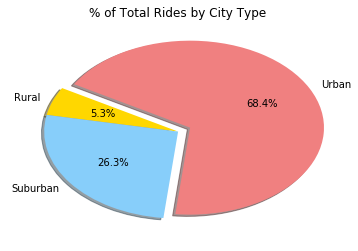

In [5]:
# SAMPLE OUTPUT. REFERENCE ONLY. DO NOT RUN OR DELETE.

## Total Drivers by City Type

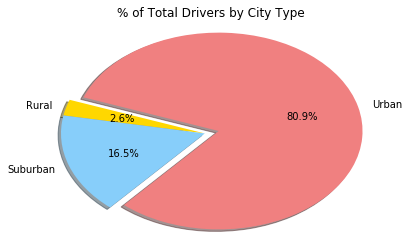

In [9]:
# Calculate Driver Percents
city_type_driver_count = city_df.groupby('type')['driver_count'].sum()
# print(city_type_driver_count.head())

city_type_driver_pct = city_type_driver_count.divide(city_type_driver_count.sum())*100
# print(city_type_driver_pct)

# Build Pie Charts
labels=['Rural', 'Suburban', 'Urban']
sizes = city_type_driver_pct.values
explode = (0, 0, 0.1)
colors = ['gold','lightskyblue','lightcoral']
fig4, ax4 = plt.subplots()
ax4.pie(sizes, explode=explode, labels=labels, colors=colors, autopct= '%1.1f%%',
        shadow=True, startangle=160)

plt.title("% of Total Drivers by City Type")
plt.axis('auto')

# Save Figure
pie_chart_3 = plt.savefig('pct_total_drivers_by_city_type_pie_chart.png')

# Show Figure
plt.show()

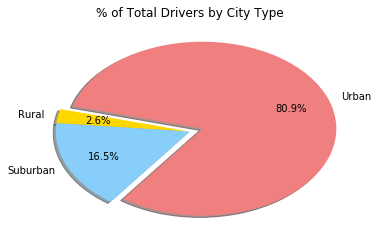

In [6]:
# SAMPLE OUTPUT. REFERENCE ONLY. DO NOT RUN OR DELETE.